# Crypto Market Portfolio Optimization with Python

Portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different cryptos to achieve diversification. Using techniques such as Modern Portfolio Theory [MPT](https://en.wikipedia.org/wiki/Modern_portfolio_theory), I can construct an efficient portfolio that relies on the efficient frontier to represent the optimal trade-off between risk and return.

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. I will collect real-time stock market data using the yfinance API

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
Tickers =['BTC-USD','BNB-USD','ETH-USD','XRP-USD','SOL-USD','LINK-USD','SUI20947-USD','AAVE-USD','TRX-USD','DOGE-USD']

In [5]:
from datetime import date, timedelta

#define the time period for the data
end_date=date.today().strftime('%Y-%m-%d')
start_date= (date.today()-timedelta(days=2*365)).strftime('%Y-%m-%d')

In [7]:
#download the data
data=yf.download(Tickers,start=start_date, end=end_date,auto_adjust=False,progress=False)
data.head()

Price       Adj Close                                                   \
Ticker       AAVE-USD     BNB-USD       BTC-USD  DOGE-USD      ETH-USD   
Date                                                                     
2023-08-26  56.641541  216.364243  26008.462891  0.062868  1646.306763   
2023-08-27  58.231606  218.358002  26089.693359  0.063171  1657.513062   
2023-08-28  58.262287  218.718567  26106.150391  0.063438  1652.457397   
2023-08-29  59.522854  226.862885  27727.392578  0.066390  1729.725708   
2023-08-30  57.763817  223.799438  27297.265625  0.065838  1705.112183   

Price                                                             ...  \
Ticker      LINK-USD    SOL-USD SUI20947-USD   TRX-USD   XRP-USD  ...   
Date                                                              ...   
2023-08-26  6.002890  20.280424     0.588408  0.077432  0.523470  ...   
2023-08-27  6.023508  20.786839     0.582549  0.077515  0.523844  ...   
2023-08-28  5.978857  20.557100     0.547615  0.076383  0.523248  ...   
2023-08-29  6.192354  21.780764     0.545718  0.077333  0.540065  ...   
2023-08-30  5.937587  20.834904     0.525431  0.075627  0.528194  ...   

Price         Volume                                                  \
Ticker      AAVE-USD    BNB-USD      BTC-USD   DOGE-USD      ETH-USD   
Date                                                                   
2023-08-26  51956085  273738258   6034817316  127881732   2423247747   
2023-08-27  56453724  325410553   6913768611  141407750   2624065031   
2023-08-28  56331503  332786869  11002805166  169636026   4855588534   
2023-08-29  73819166  593296661  29368391712  445903123  11304916729   
2023-08-30  61029813  359750612  16343655235  260654192   5023904190   

Price                                                                 
Ticker       LINK-USD    SOL-USD SUI20947-USD    TRX-USD     XRP-USD  
Date                                                                  
2023-08-26   99248480  144065112    216884261  122098369   541153725  
2023-08-27   88471317  177496132    118434827  115622858   584757090  
2023-08-28  146306006  200600033    125116235  146293864   842593344  
2023-08-29  228799176  469679540    163055225  205229425  1468584828  
2023-08-30  145867706  292322455    107728087  176403792   967541032  

[5 rows x 60 columns]

In [9]:
# reset index to bring Date into the columns for the melt function
data=data.reset_index()
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])
data_melted.head()

,Date,Attribute,Ticker,value
0,2023-08-26,Adj Close,AAVE-USD,56.641541
1,2023-08-27,Adj Close,AAVE-USD,58.231606
2,2023-08-28,Adj Close,AAVE-USD,58.262287
3,2023-08-29,Adj Close,AAVE-USD,59.522854
4,2023-08-30,Adj Close,AAVE-USD,57.763817


In [11]:
data_melted.shape

(43800, 4)

In [13]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')
data_pivoted.head()

Attribute               Adj Close         Close          High           Low  \
Date       Ticker                                                             
2023-08-26 AAVE-USD     56.641541     56.641541     57.273891     56.322121   
           BNB-USD     216.364243    216.364243    218.786438    216.214035   
           BTC-USD   26008.462891  26008.462891  26107.384766  25983.878906   
           DOGE-USD      0.062868      0.062868      0.063286      0.062723   
           ETH-USD    1646.306763   1646.306763   1654.777710   1643.712646   

Attribute                    Open        Volume  
Date       Ticker                                
2023-08-26 AAVE-USD     56.884418  5.195608e+07  
           BNB-USD     218.331802  2.737383e+08  
           BTC-USD   26047.234375  6.034817e+09  
           DOGE-USD      0.063084  1.278817e+08  
           ETH-USD    1652.927246  2.423248e+09

In [15]:
crypto_data=data_pivoted.reset_index()
print(crypto_data.shape)
crypto_data.head()

(7300, 8)


Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-08-26,AAVE-USD,56.641541,56.641541,57.273891,56.322121,56.884418,5.195608e+07
1,2023-08-26,BNB-USD,216.364243,216.364243,218.786438,216.214035,218.331802,2.737383e+08
2,2023-08-26,BTC-USD,26008.462891,26008.462891,26107.384766,25983.878906,26047.234375,6.034817e+09
3,2023-08-26,DOGE-USD,0.062868,0.062868,0.063286,0.062723,0.063084,1.278817e+08
4,2023-08-26,ETH-USD,1646.306763,1646.306763,1654.777710,1643.712646,1652.927246,2.423248e+09


In [17]:
crypto_data.dtypes

Attribute
Date         datetime64[ns]
Ticker               object
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume              float64
dtype: object

Now, let's compute the 50 days and 200 days moving average and plot these along with the adjusted close price

In [28]:
short=50
long=200

unique_ticker=crypto_data['Ticker'].unique()

/var/folders/2c/9q3sgr417xvcj73rf8cnblbm0000gn/T/ipykernel_9185/787716986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA50']=ticker_data['Adj Close'].rolling(window=short).mean()
/var/folders/2c/9q3sgr417xvcj73rf8cnblbm0000gn/T/ipykernel_9185/787716986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['MA200']=ticker_data['Adj Close'].rolling(window=long).mean()


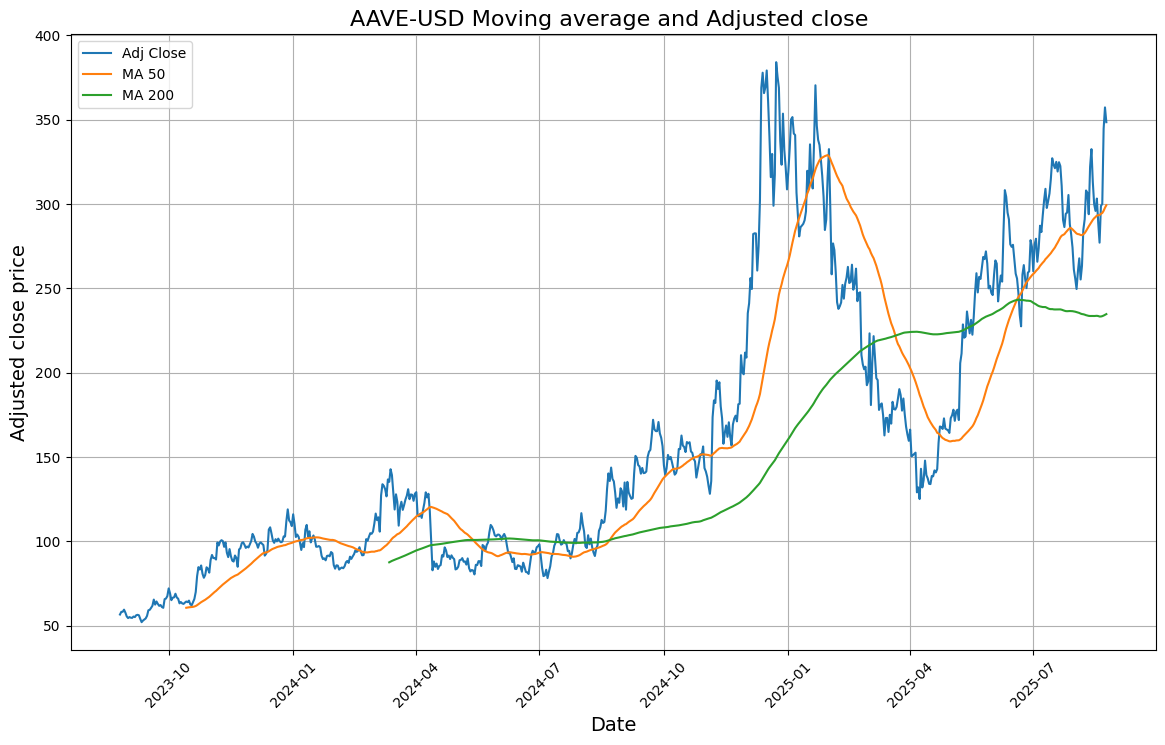

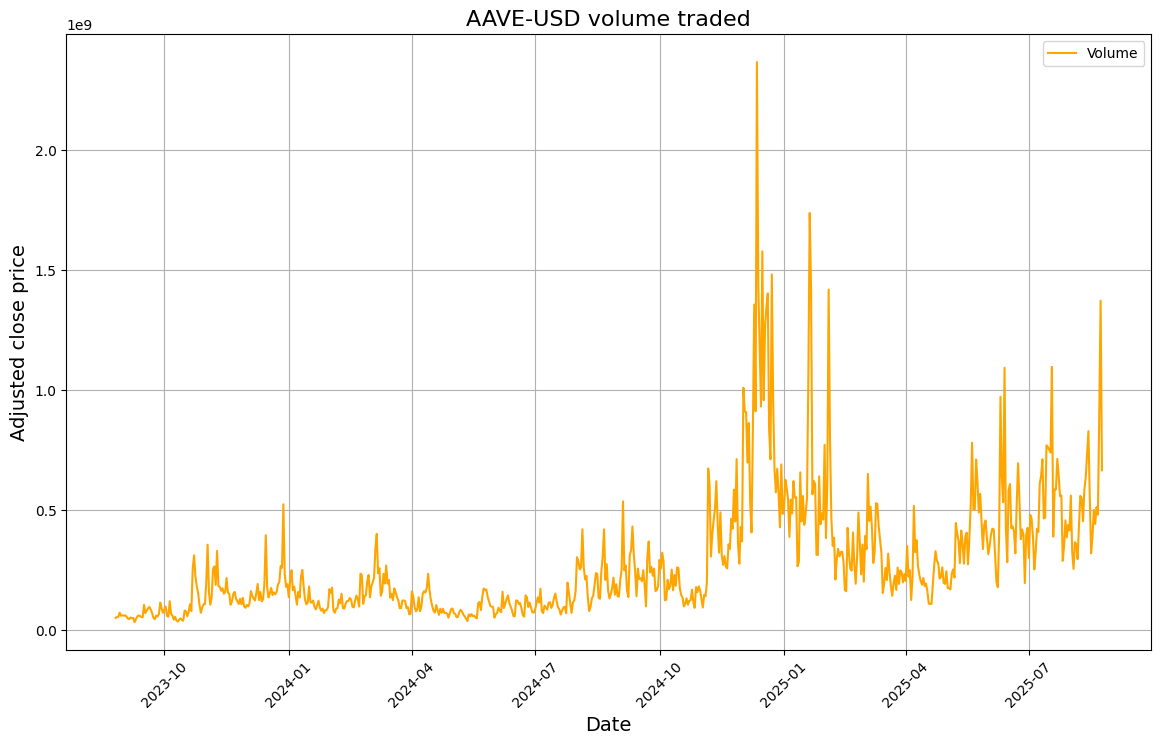

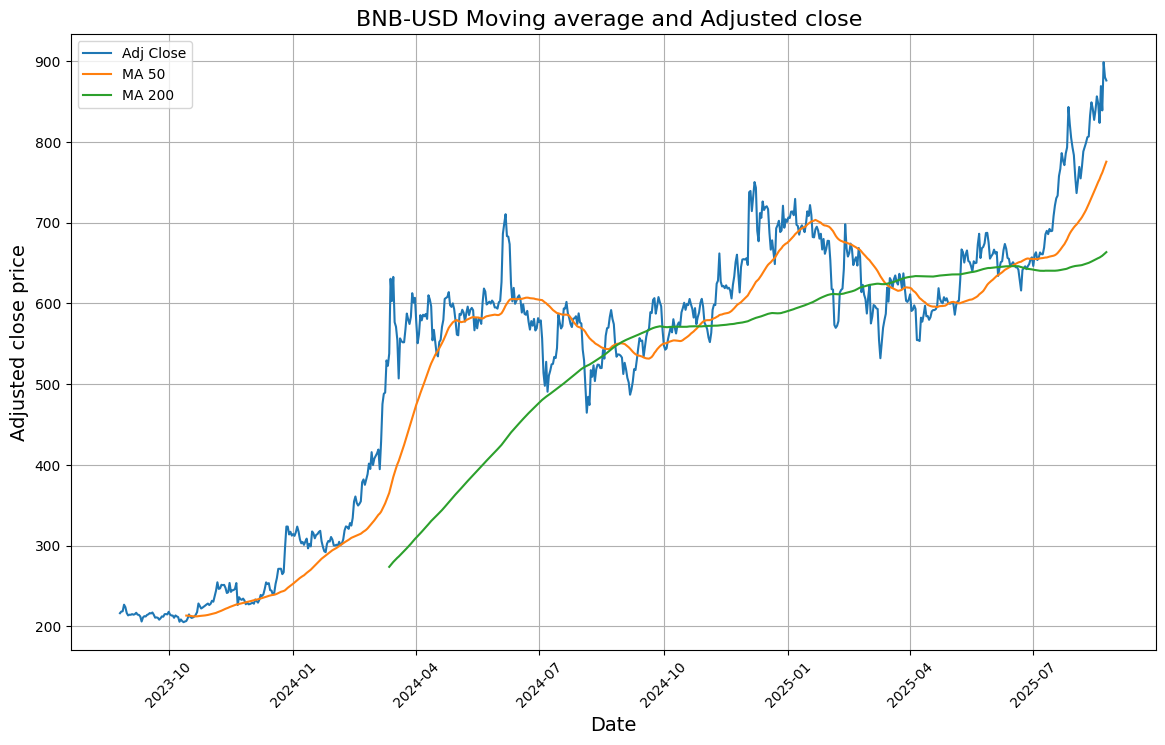

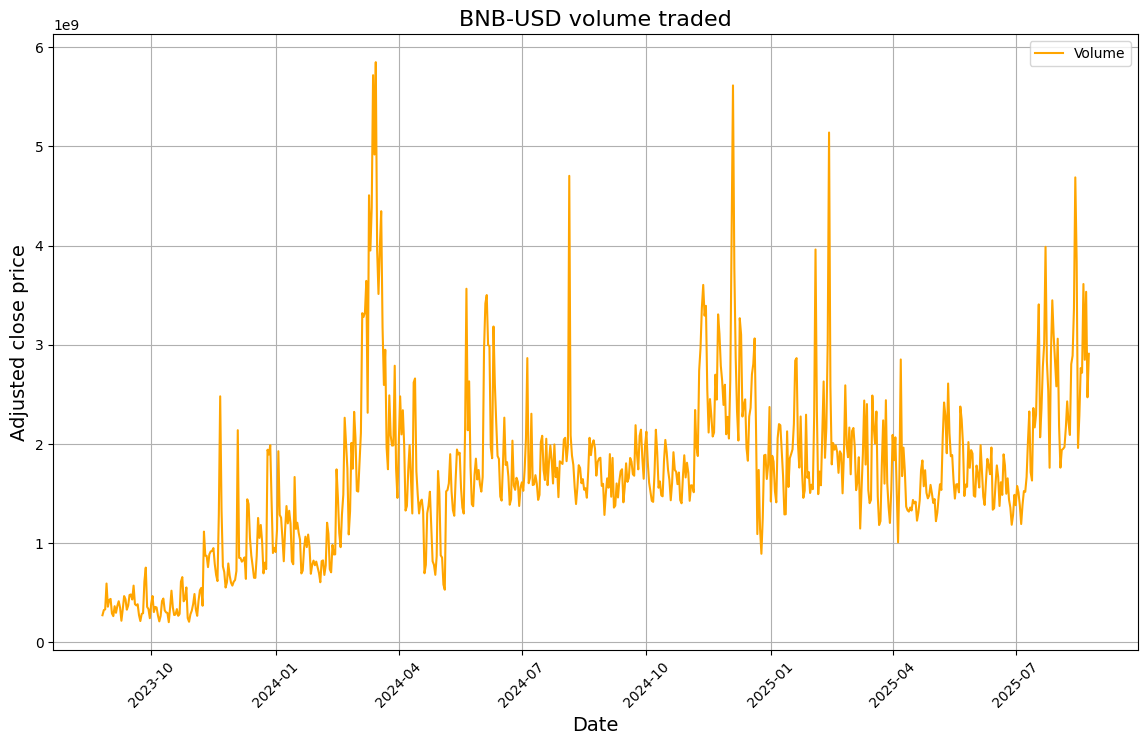

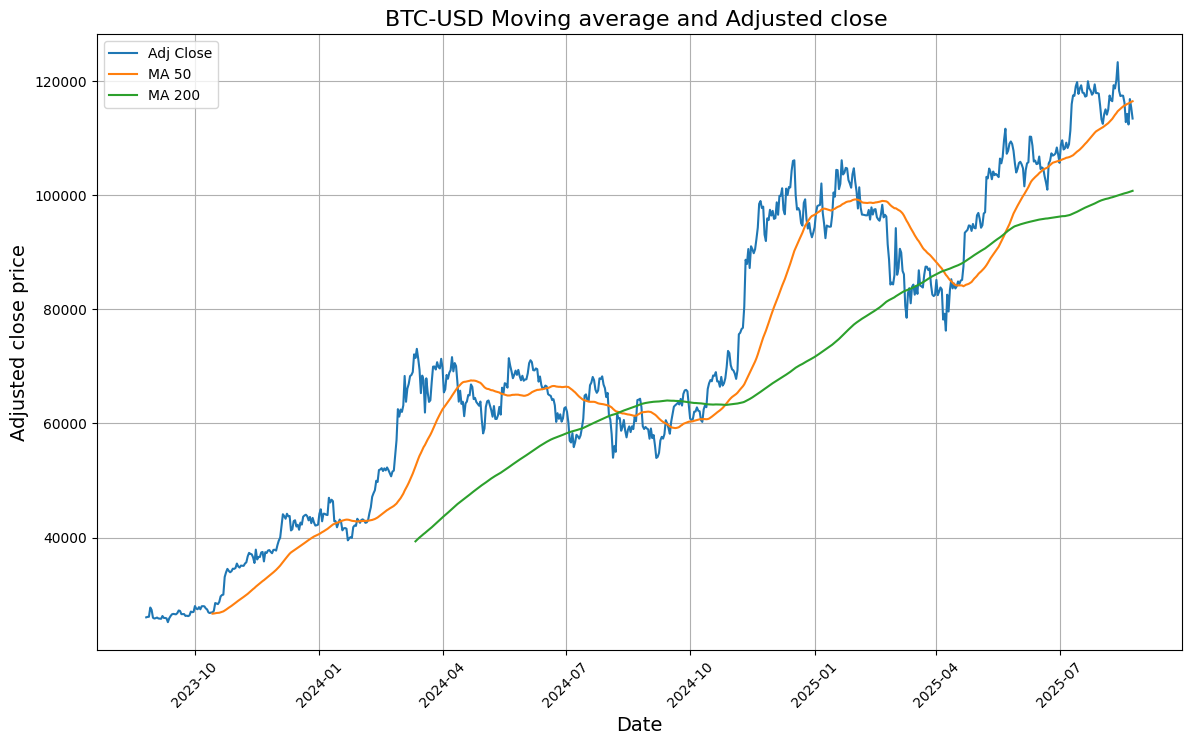

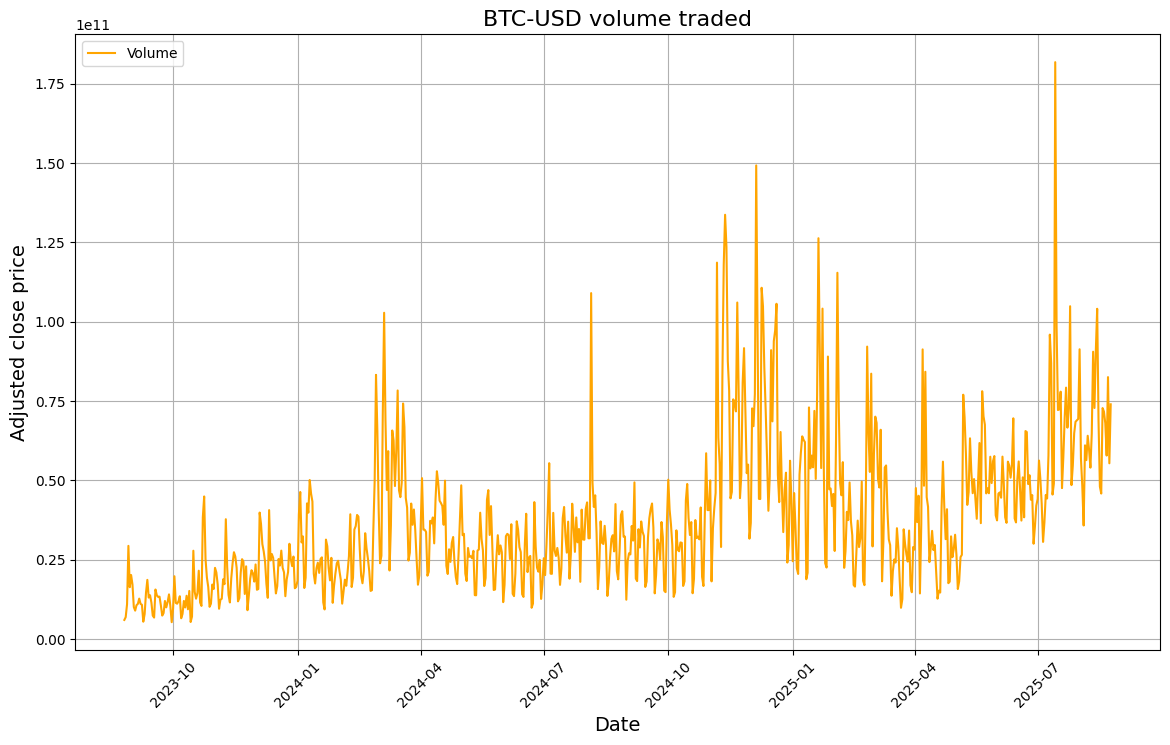

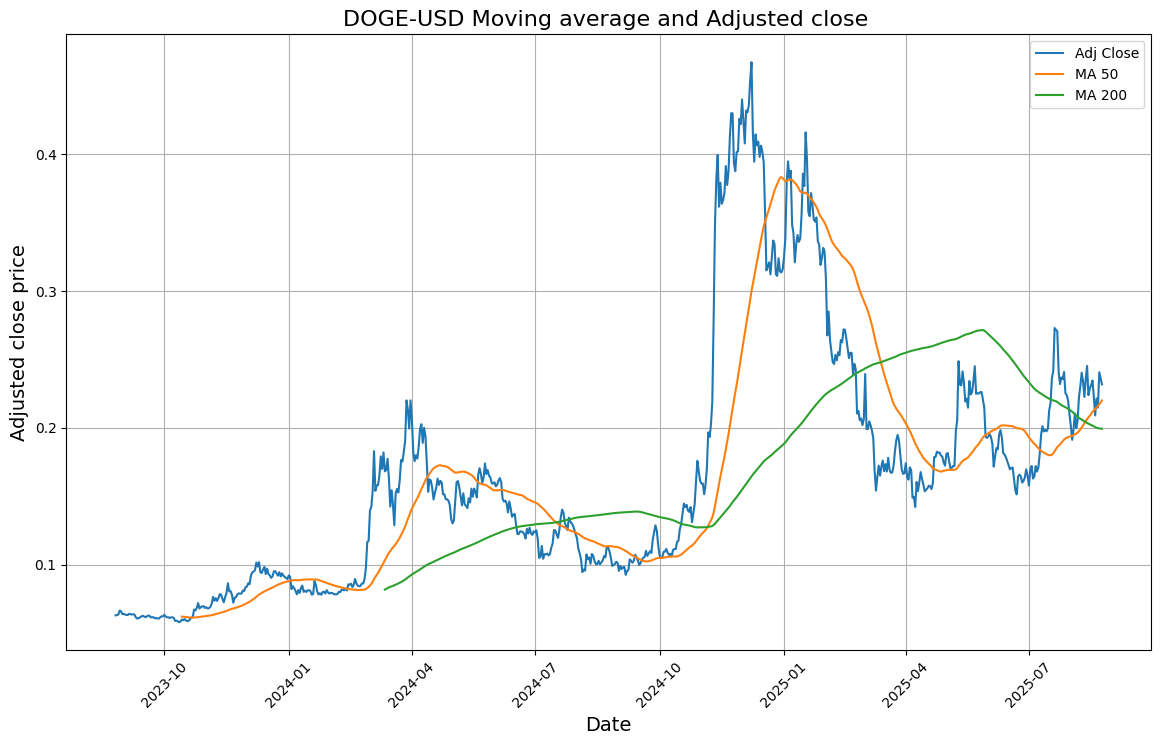

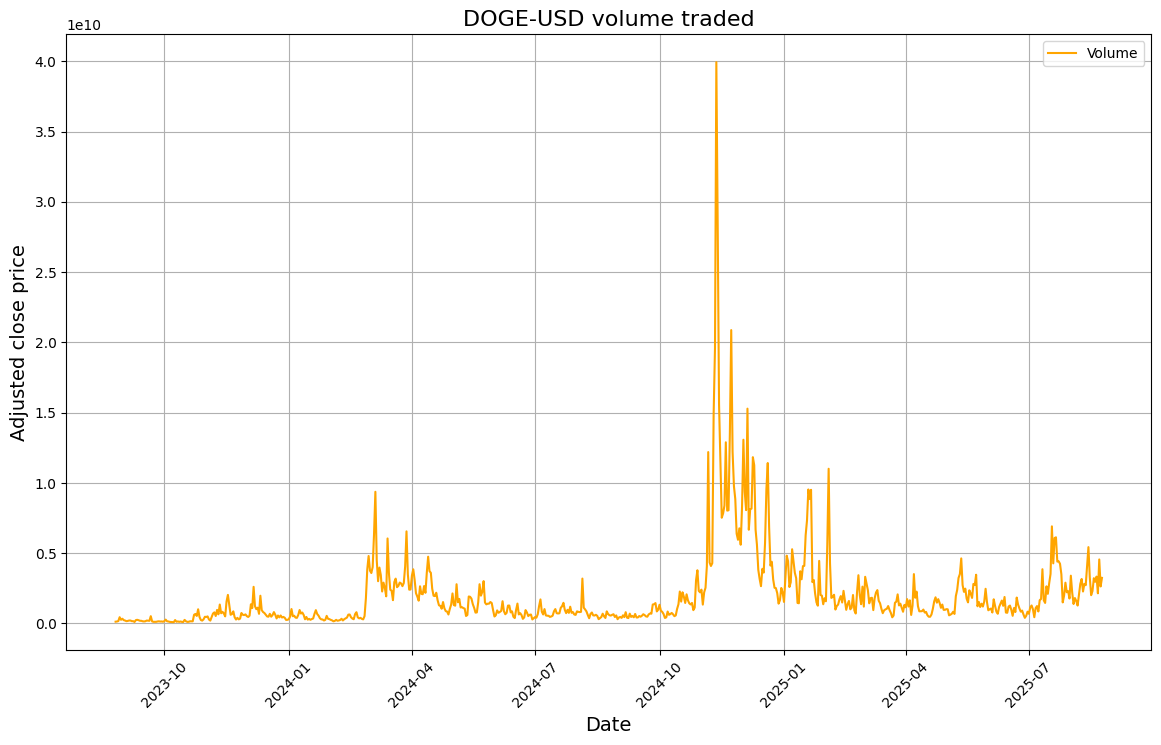

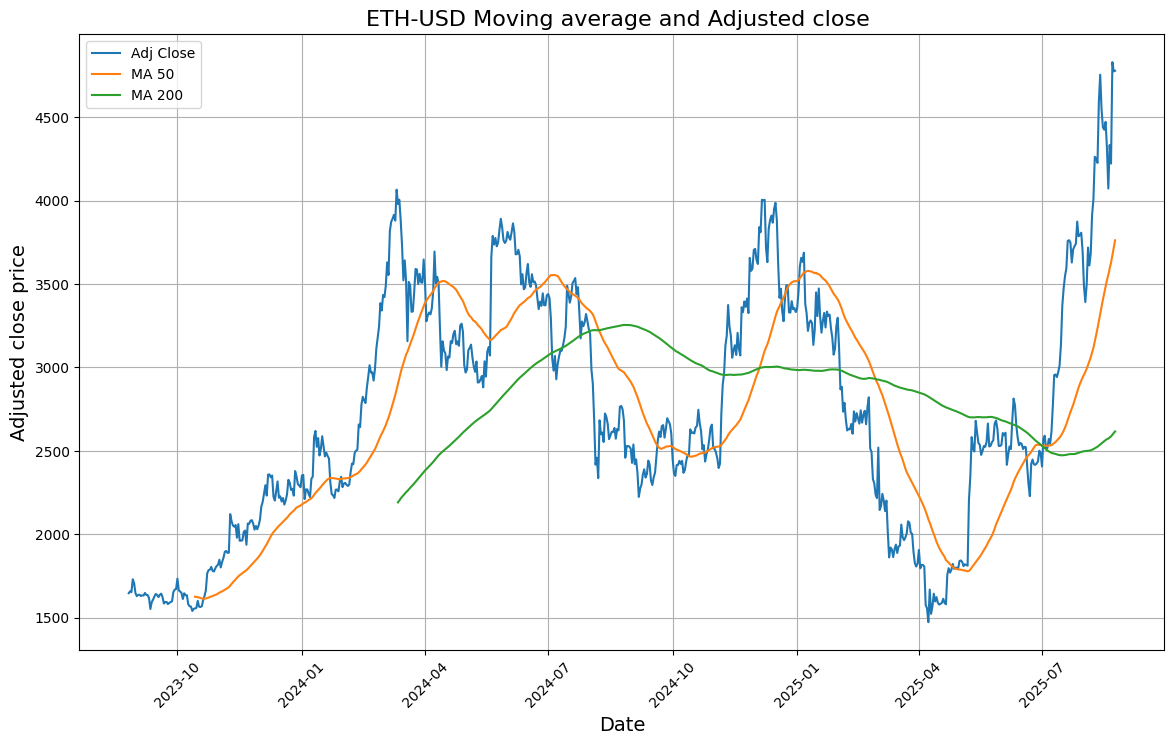

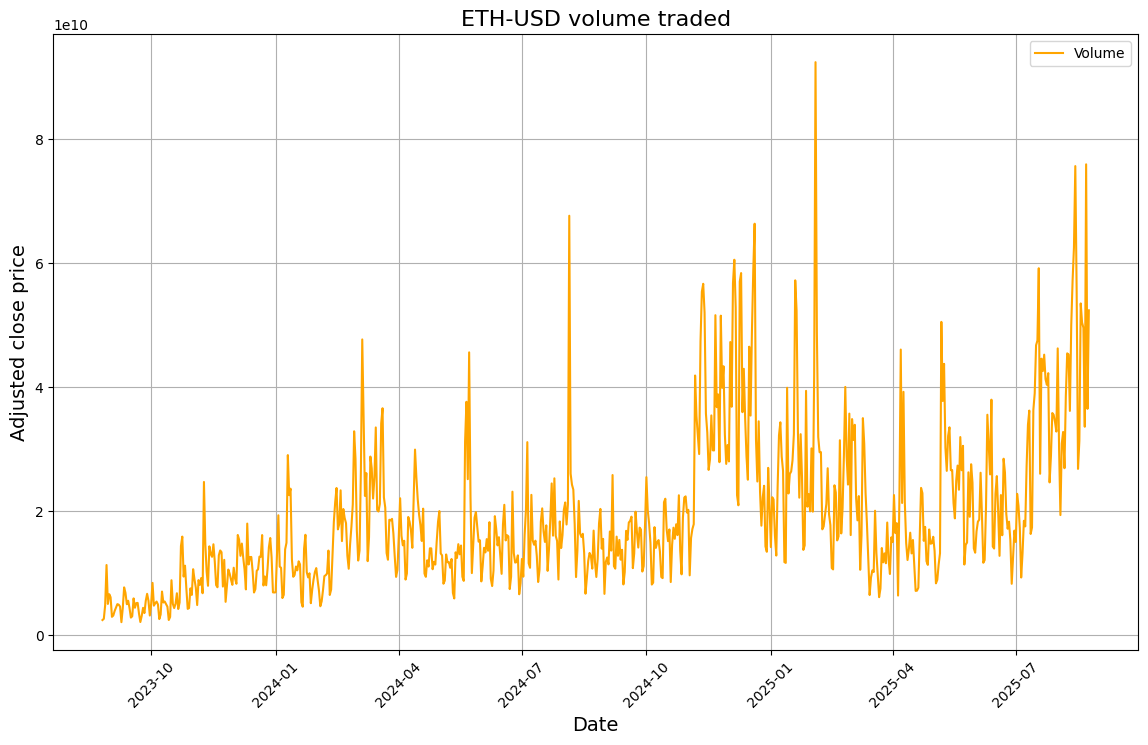

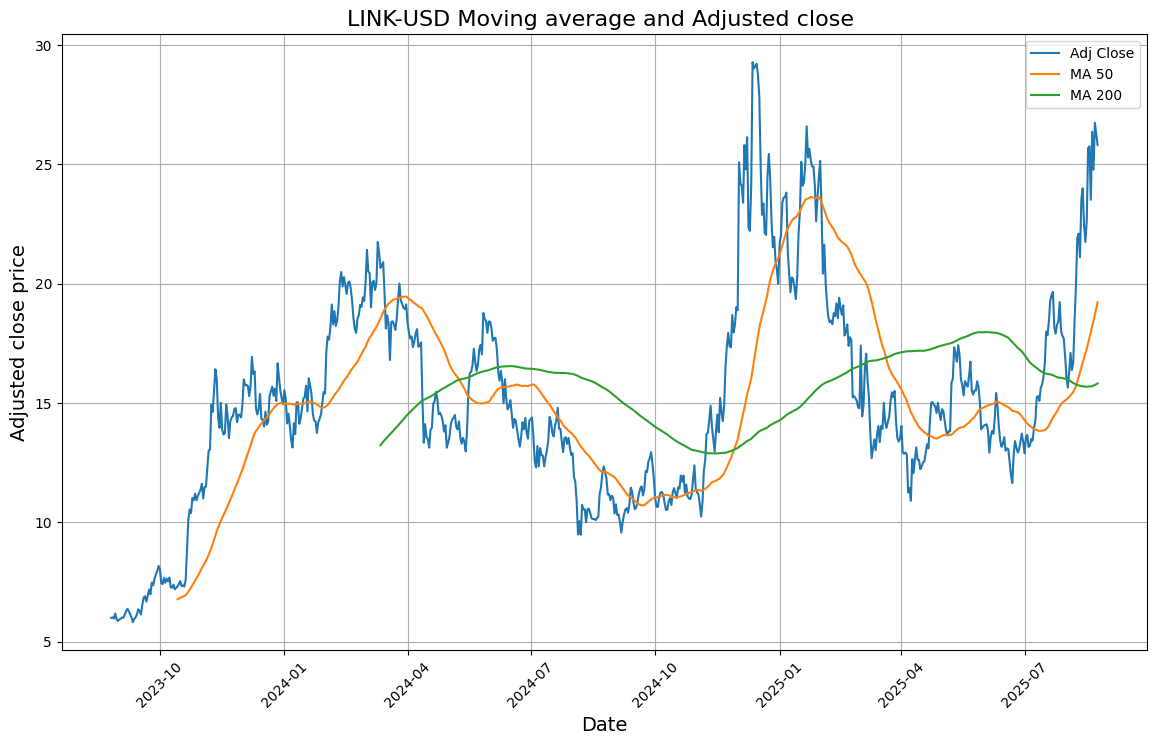

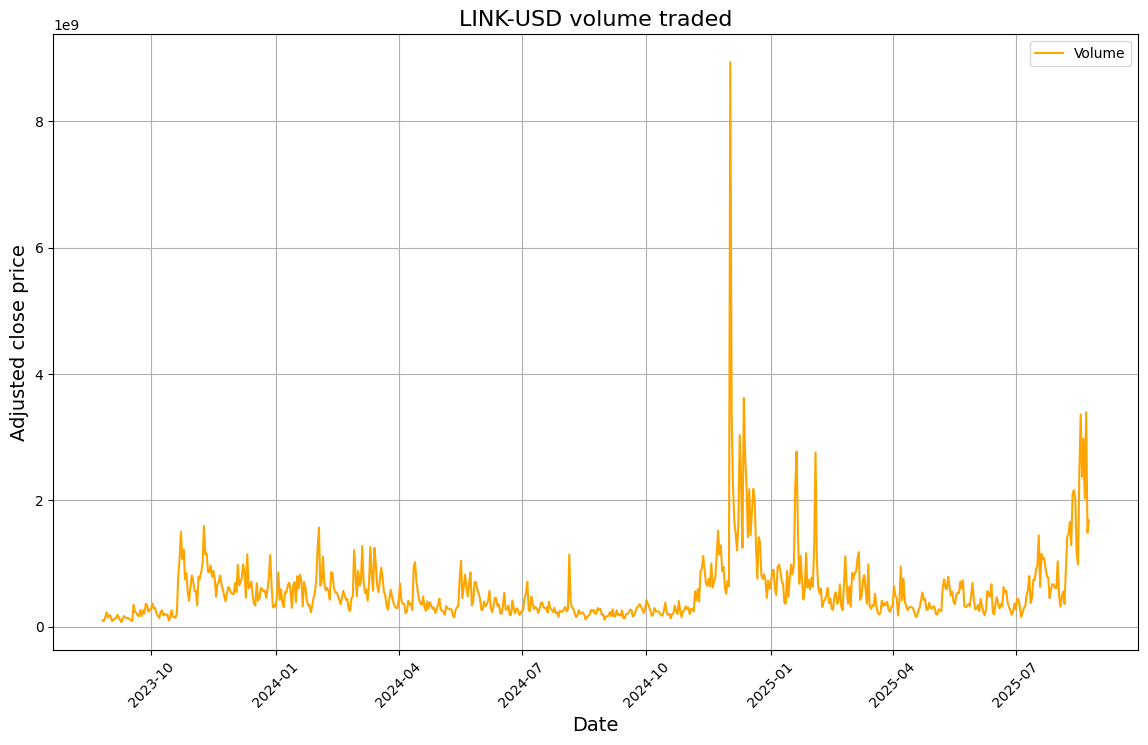

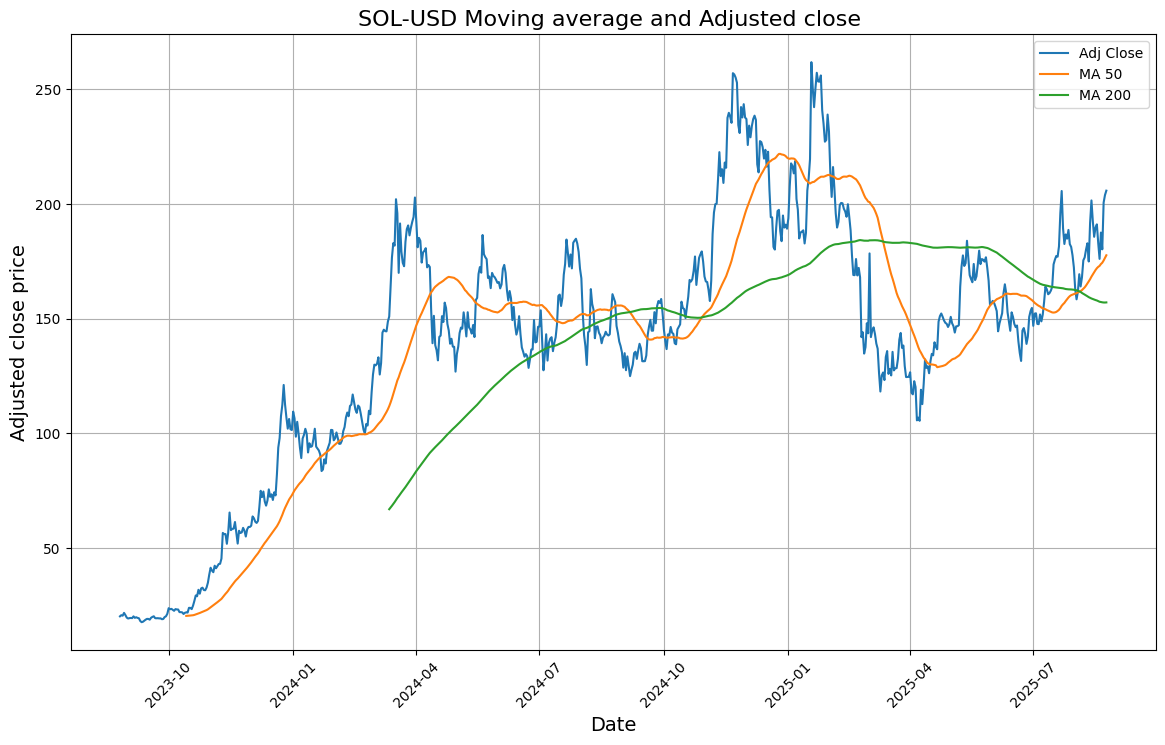

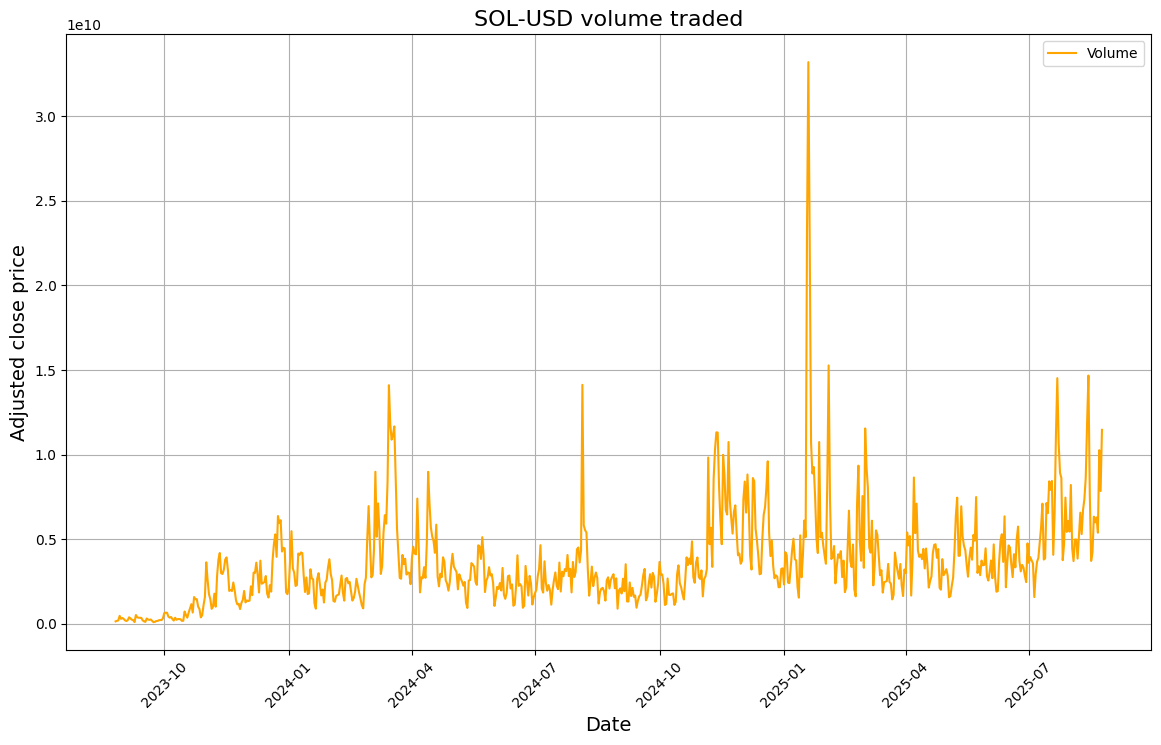

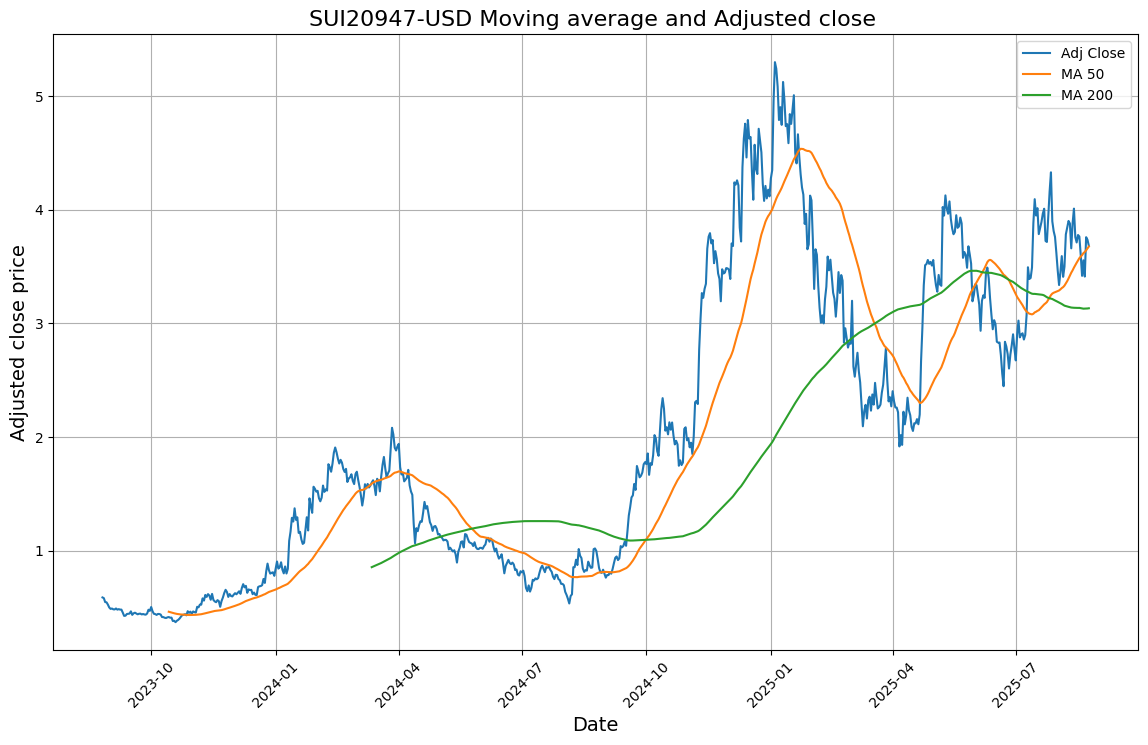

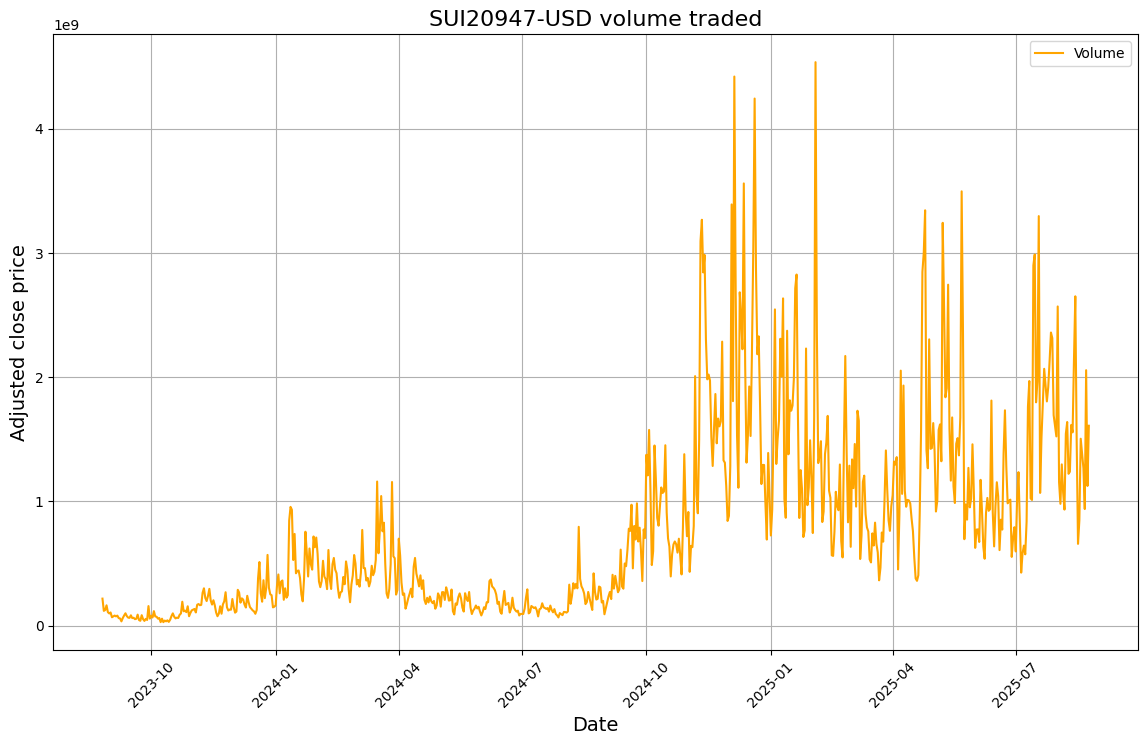

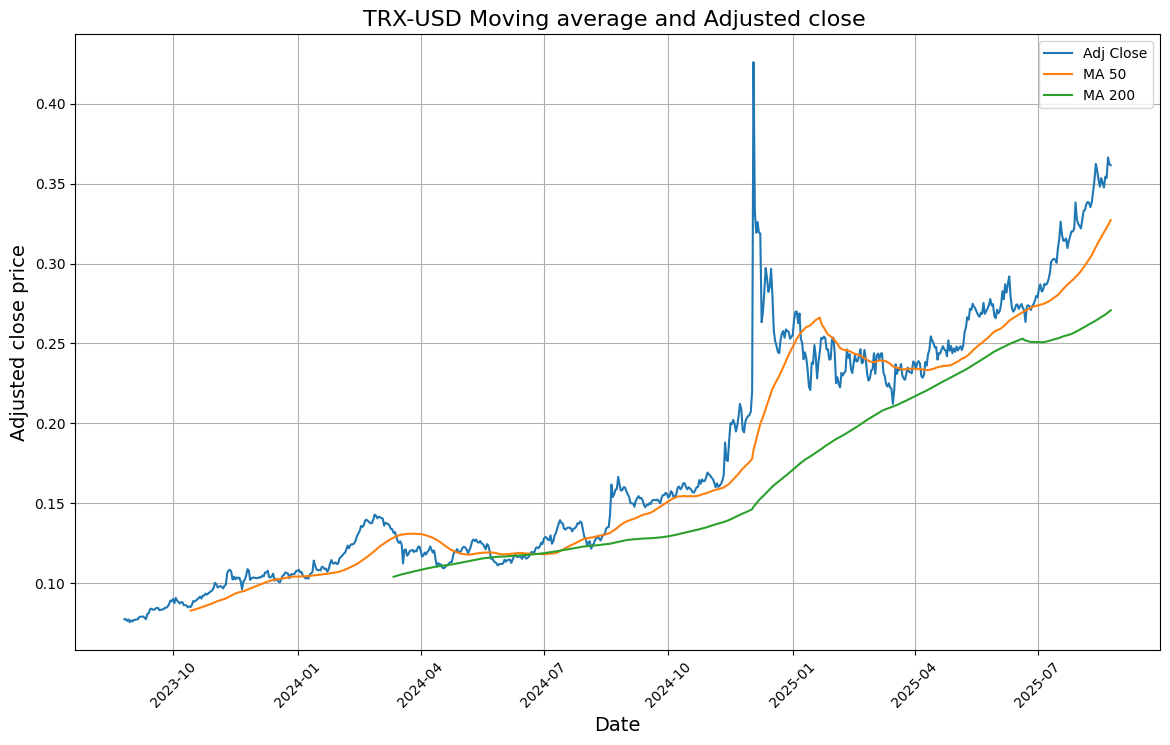

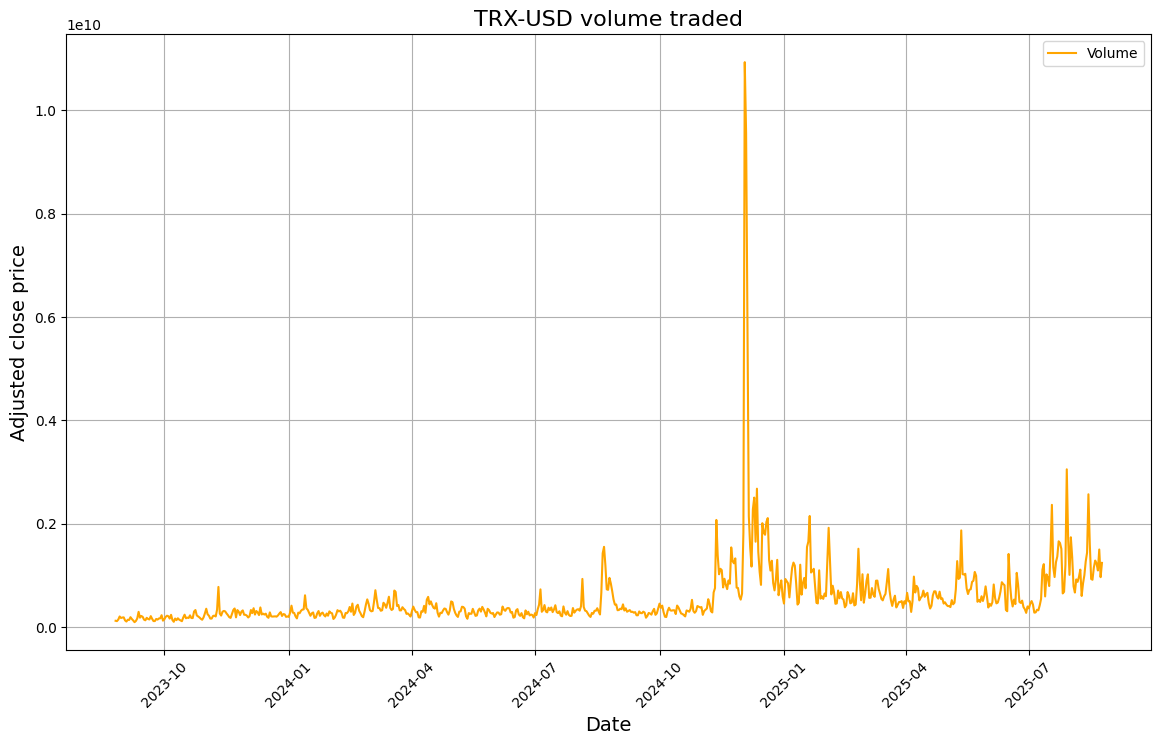

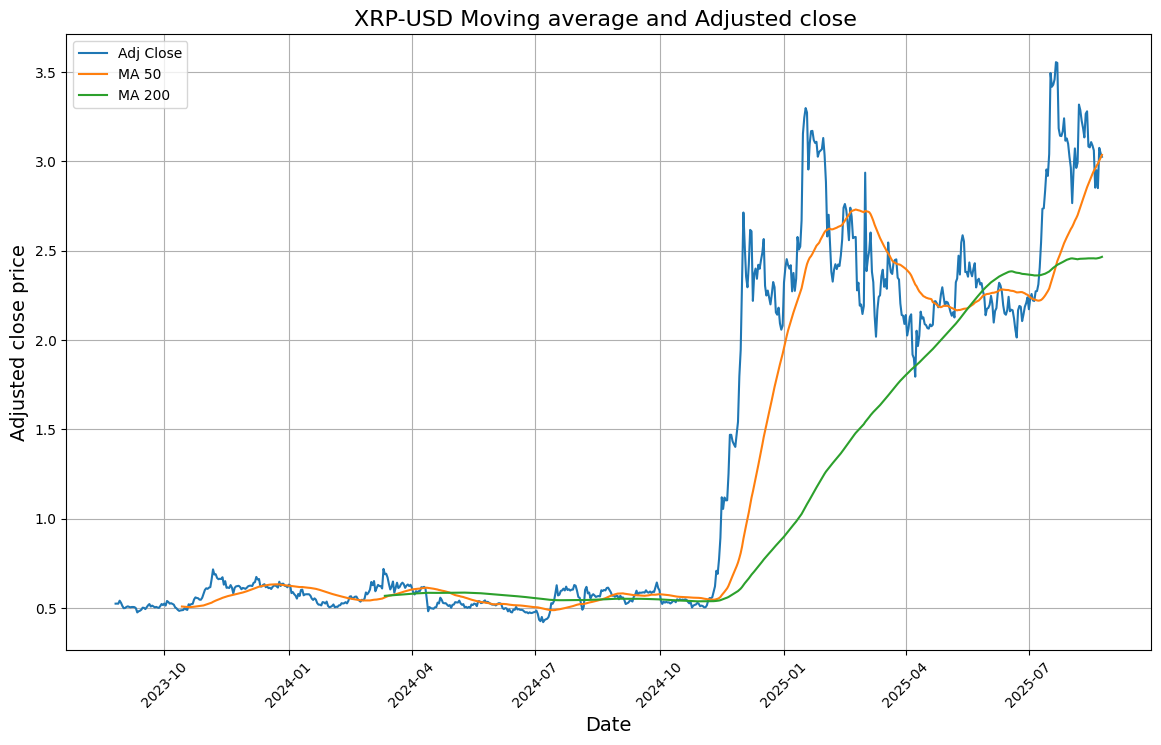

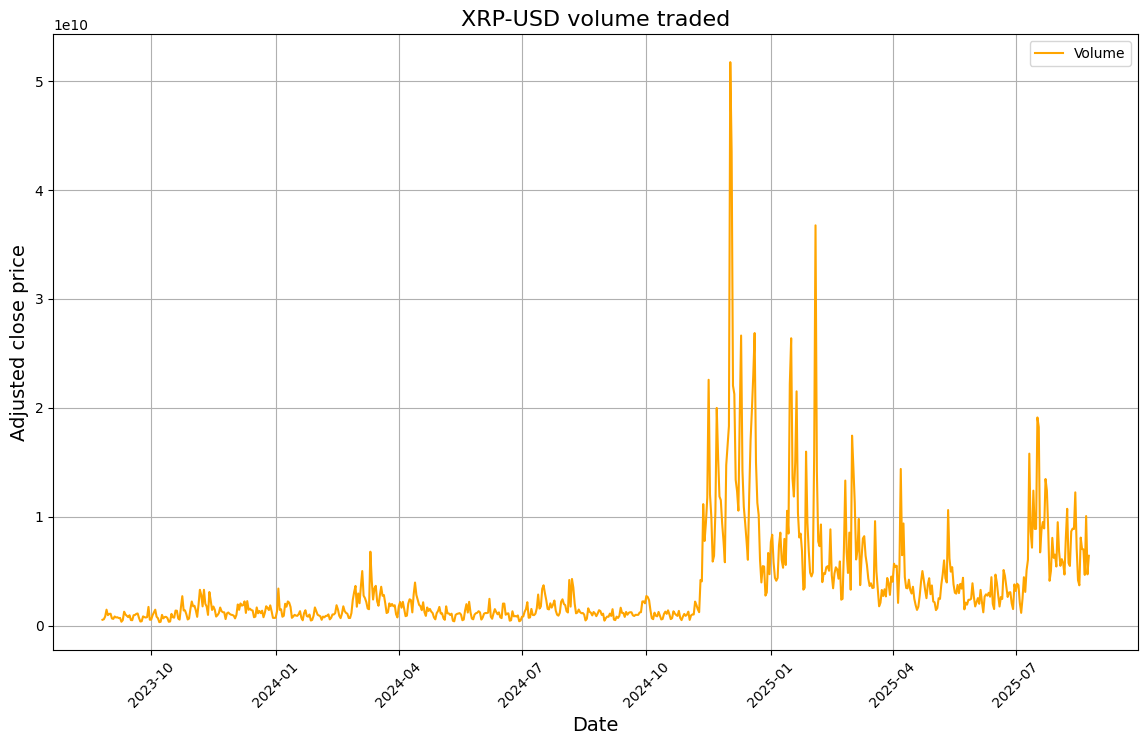

In [32]:
for ticker in unique_ticker:
    ticker_data=crypto_data[crypto_data['Ticker']==ticker]
    ticker_data['MA50']=ticker_data['Adj Close'].rolling(window=short).mean()
    ticker_data['MA200']=ticker_data['Adj Close'].rolling(window=long).mean()


    plt.figure(figsize=(14,8))

    plt.plot(ticker_data['Date'],ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data['Date'],ticker_data['MA50'], label='MA 50')
    plt.plot(ticker_data['Date'],ticker_data['MA200'], label='MA 200')
    plt.title(f'{ticker} Moving average and Adjusted close ',fontsize=16)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('Adjusted close price', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(14,8))

    plt.plot(ticker_data['Date'],ticker_data['Volume'], label='Volume',color='orange')
    plt.title(f'{ticker} volume traded',fontsize=16)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('Adjusted close price', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    plt.show()

All these assets display an upward trend in their adjusted close prices.

Let's have a look at the distribution of daily return of these crypto

In [38]:
crypto_data['Daily return']=crypto_data.groupby('Ticker')['Adj Close'].pct_change()

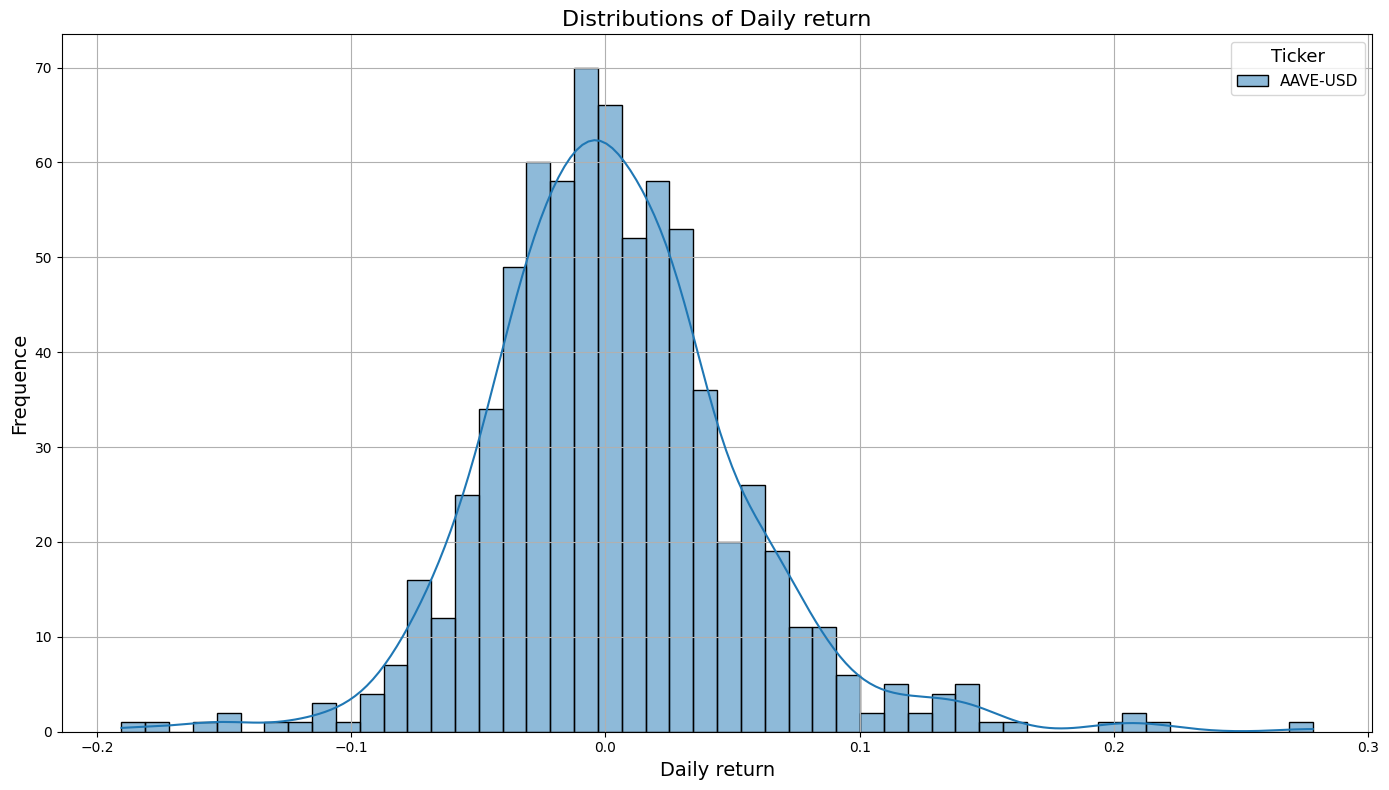

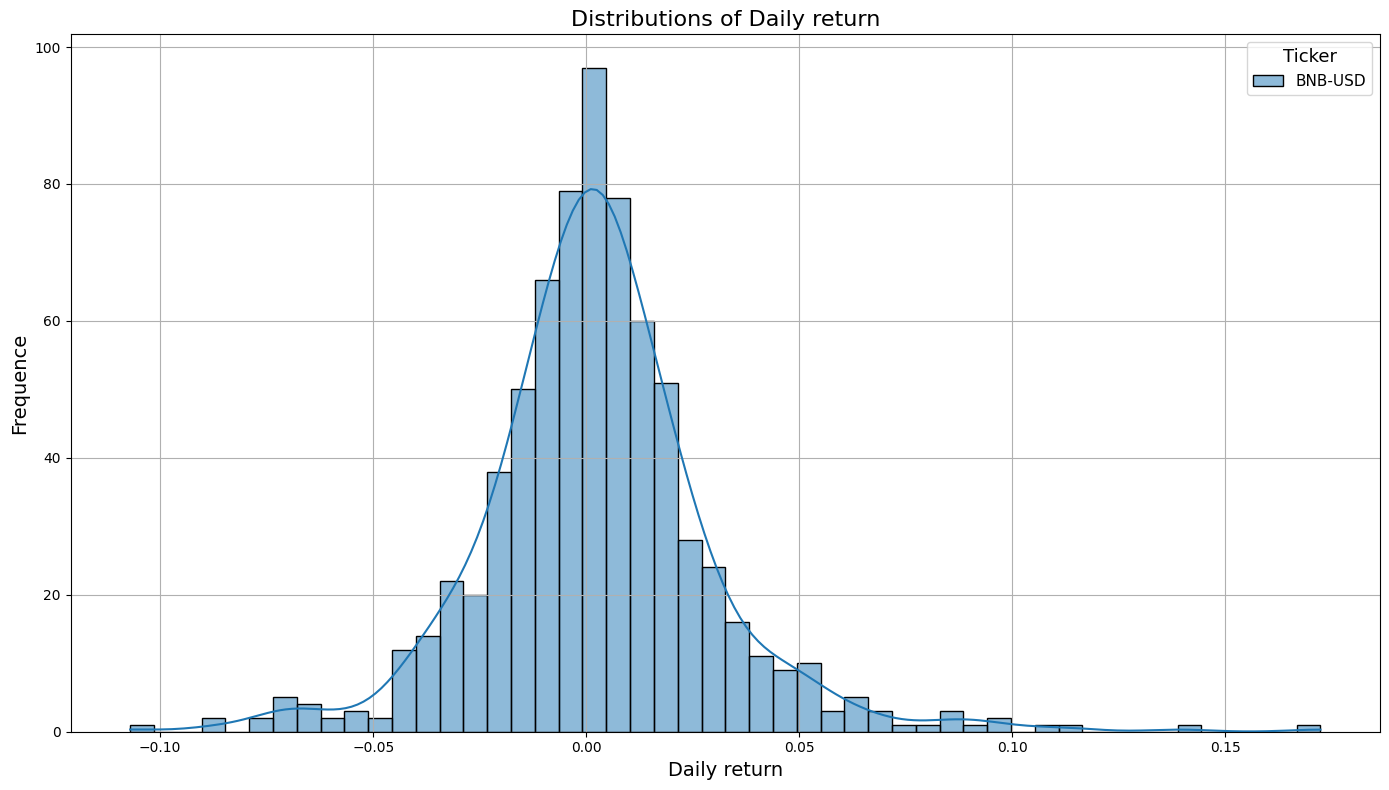

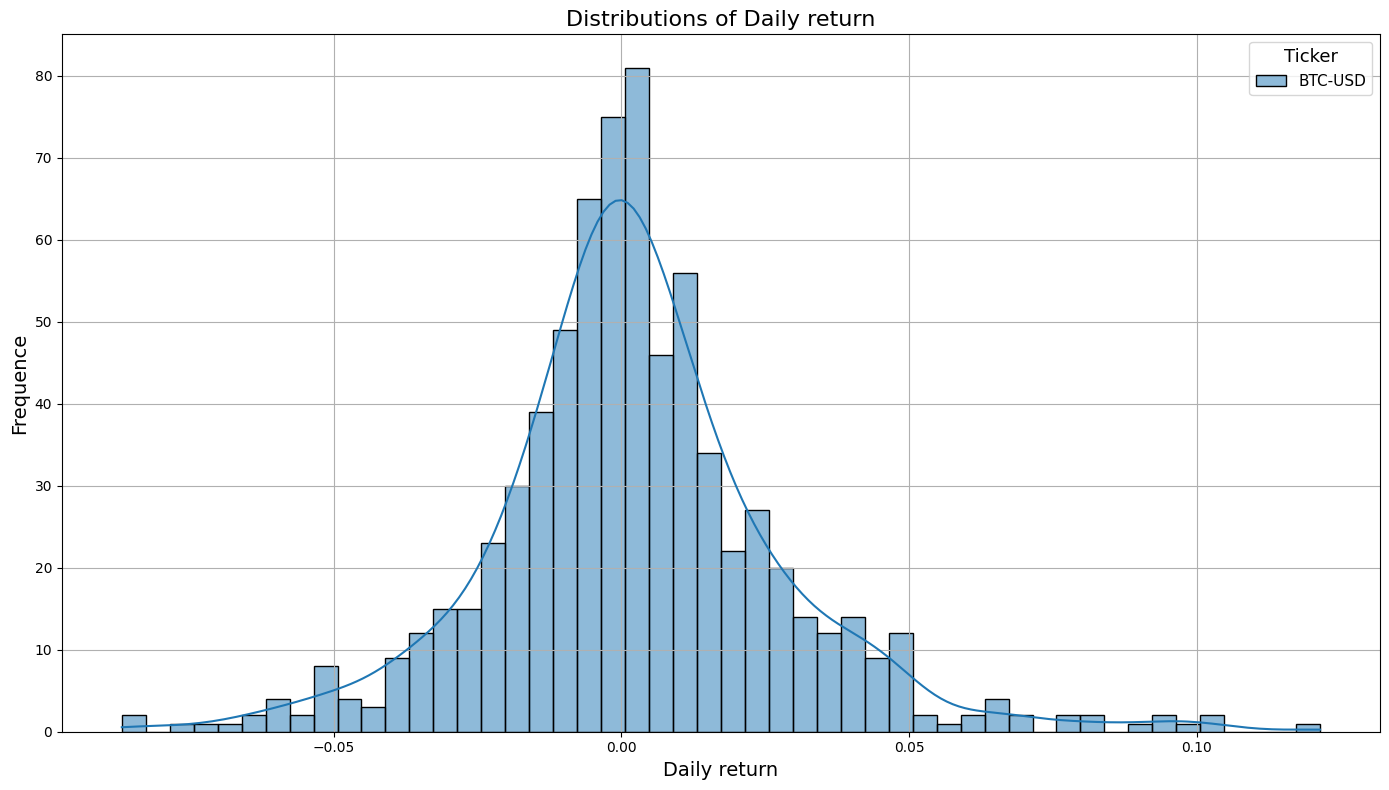

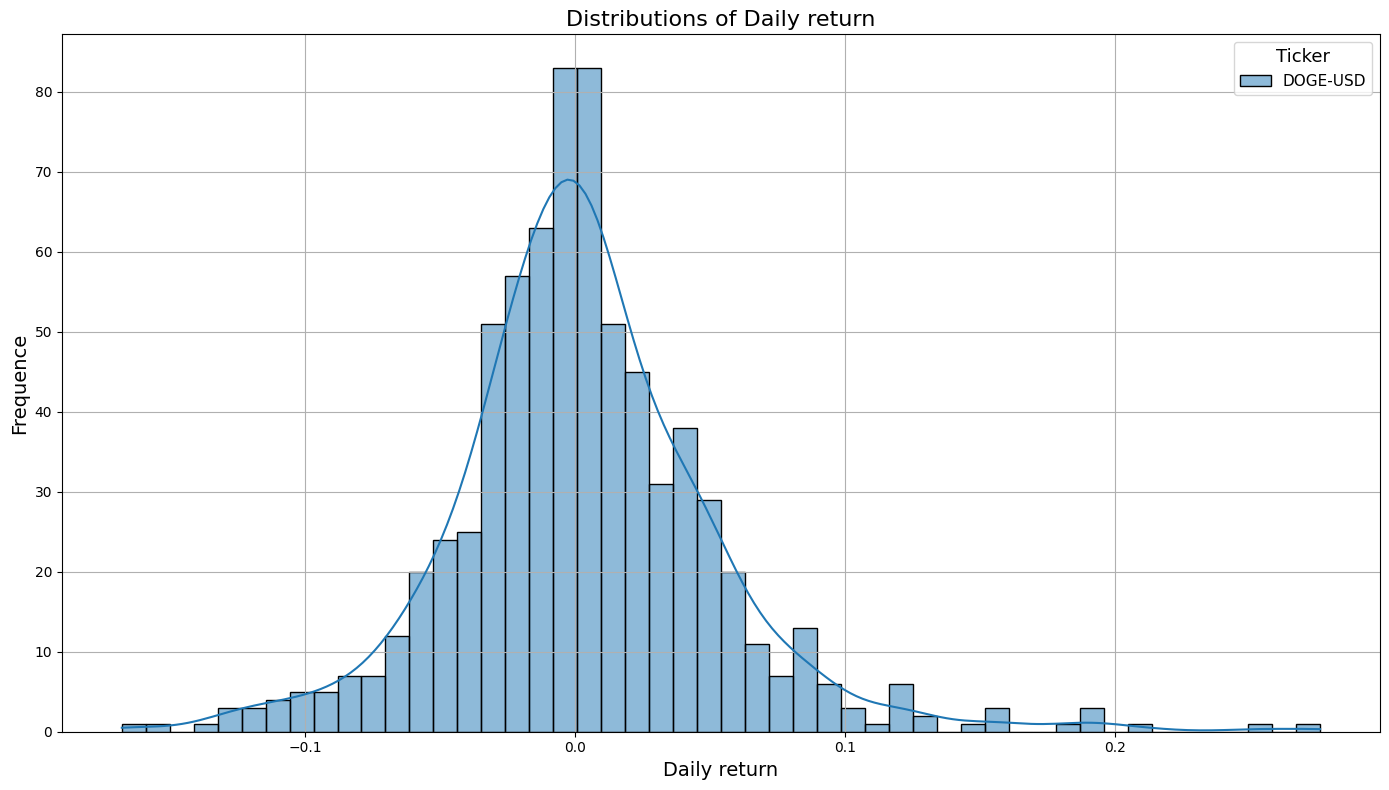

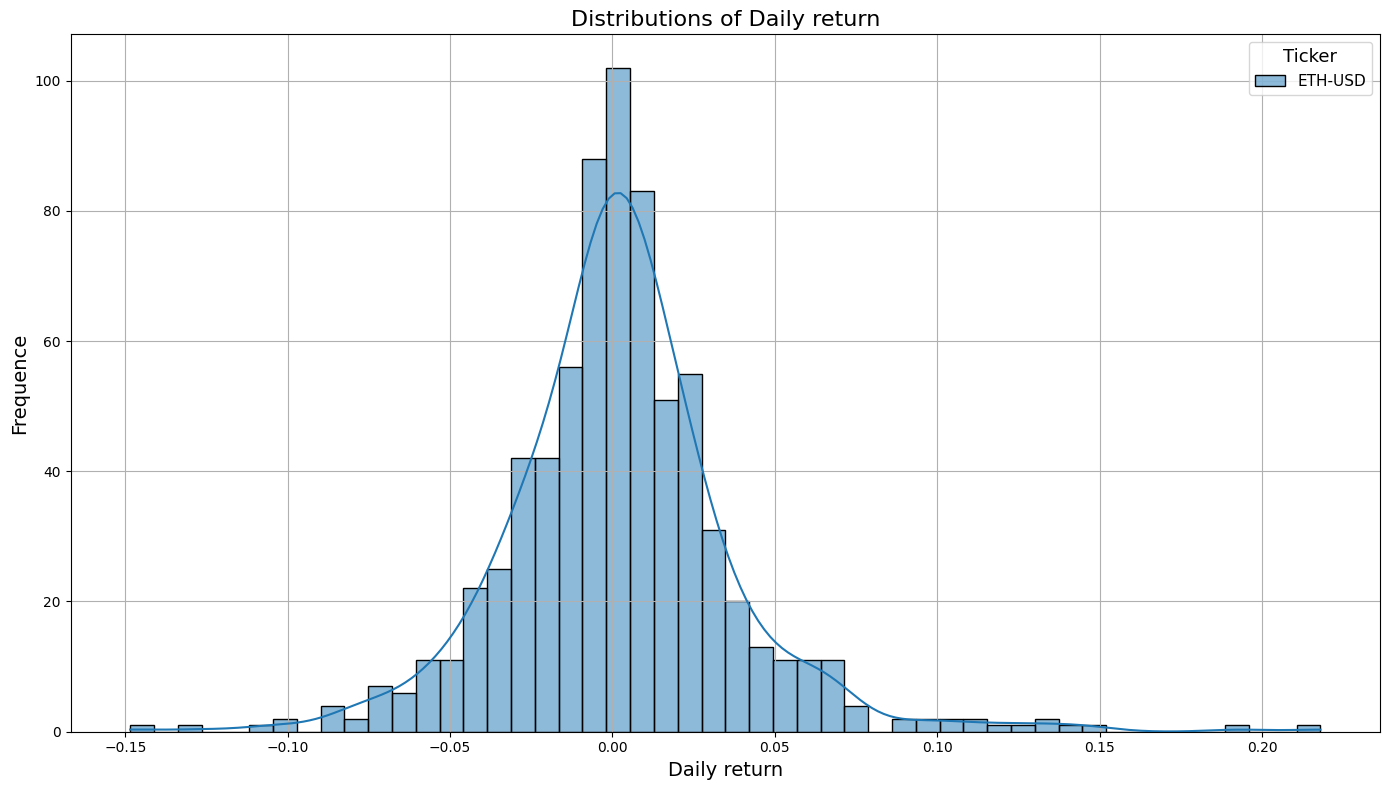

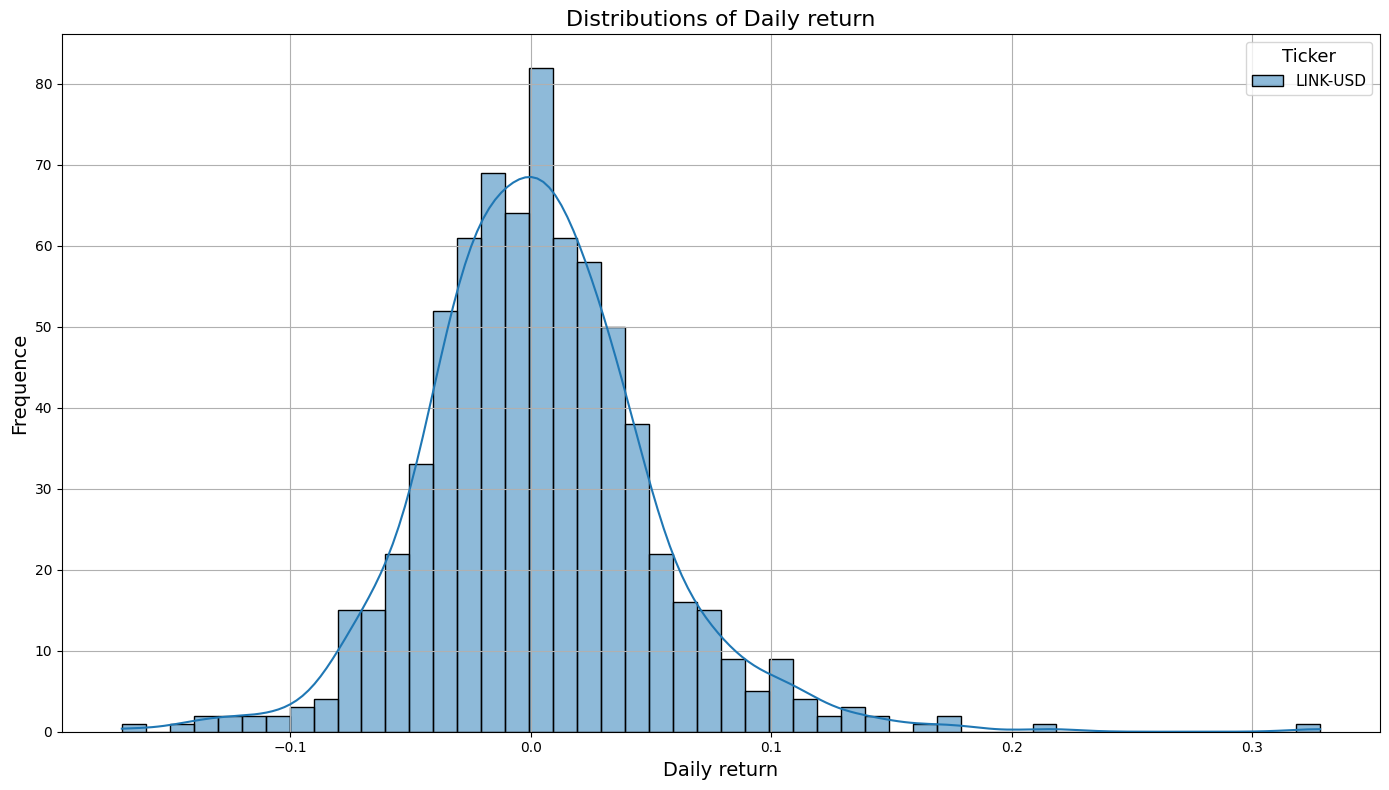

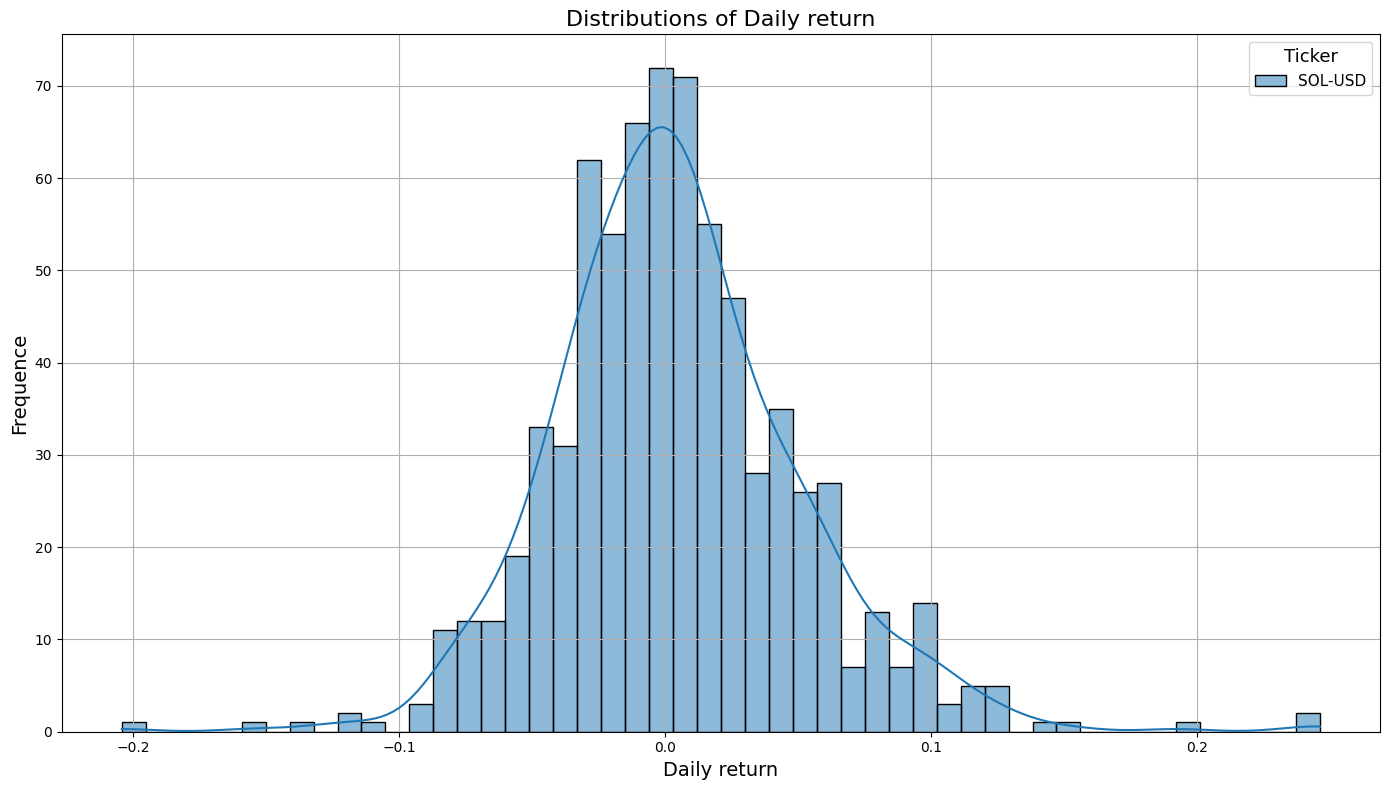

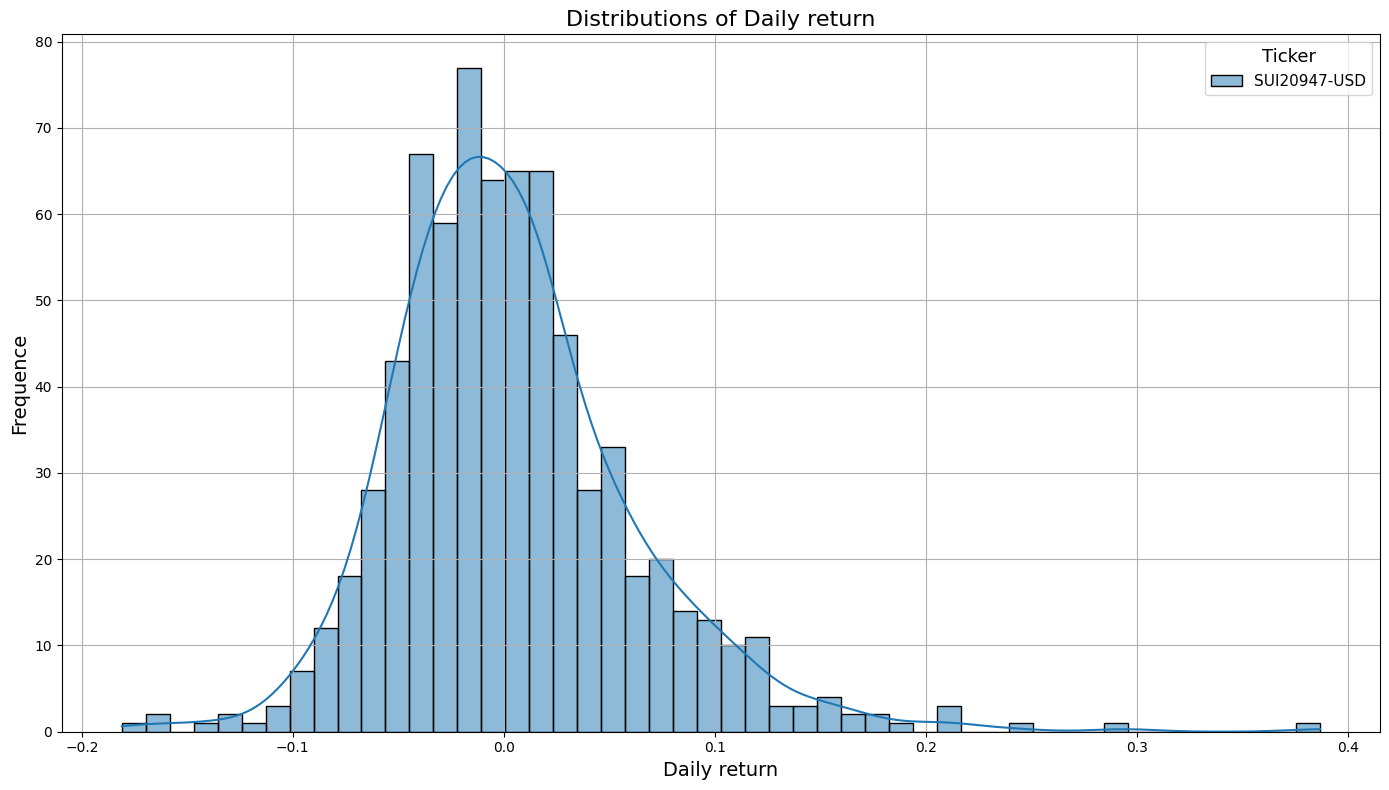

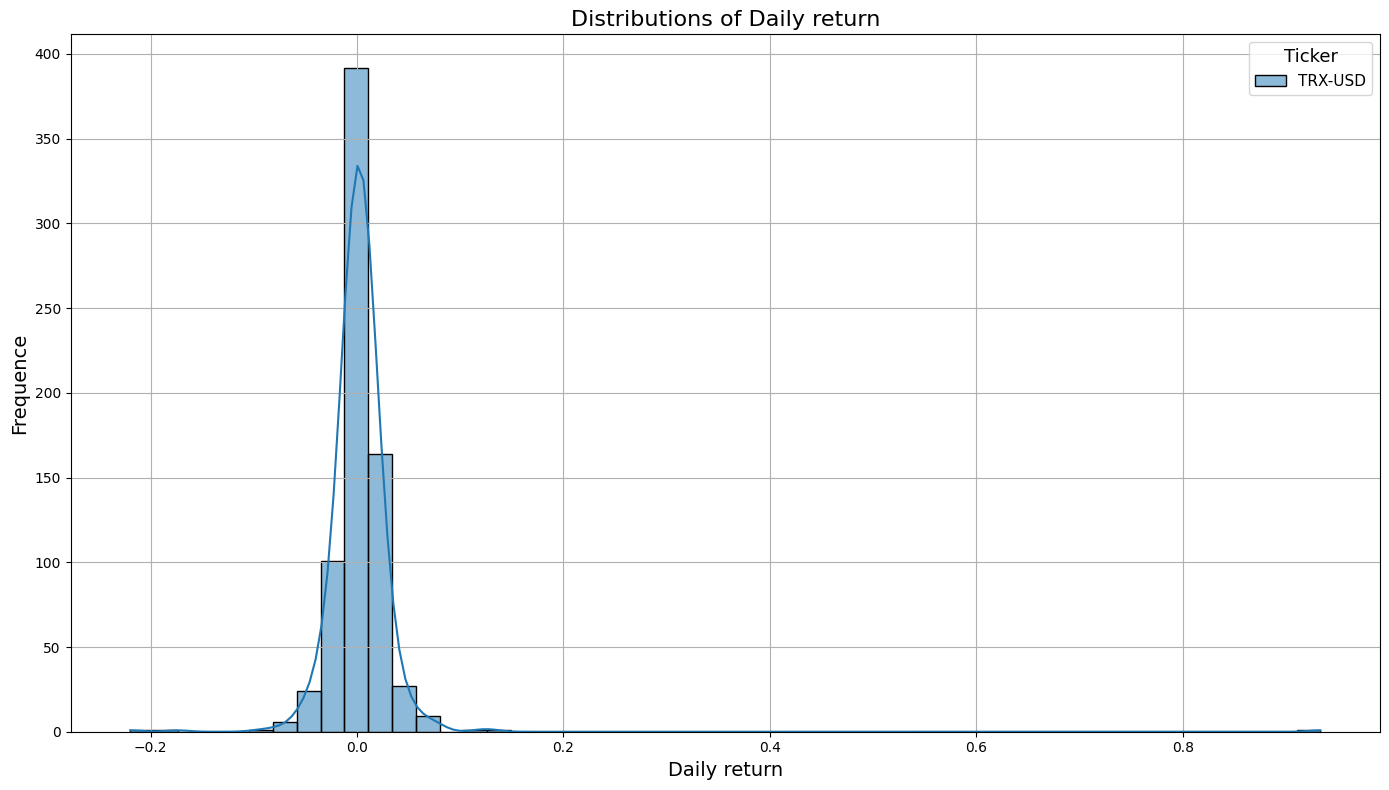

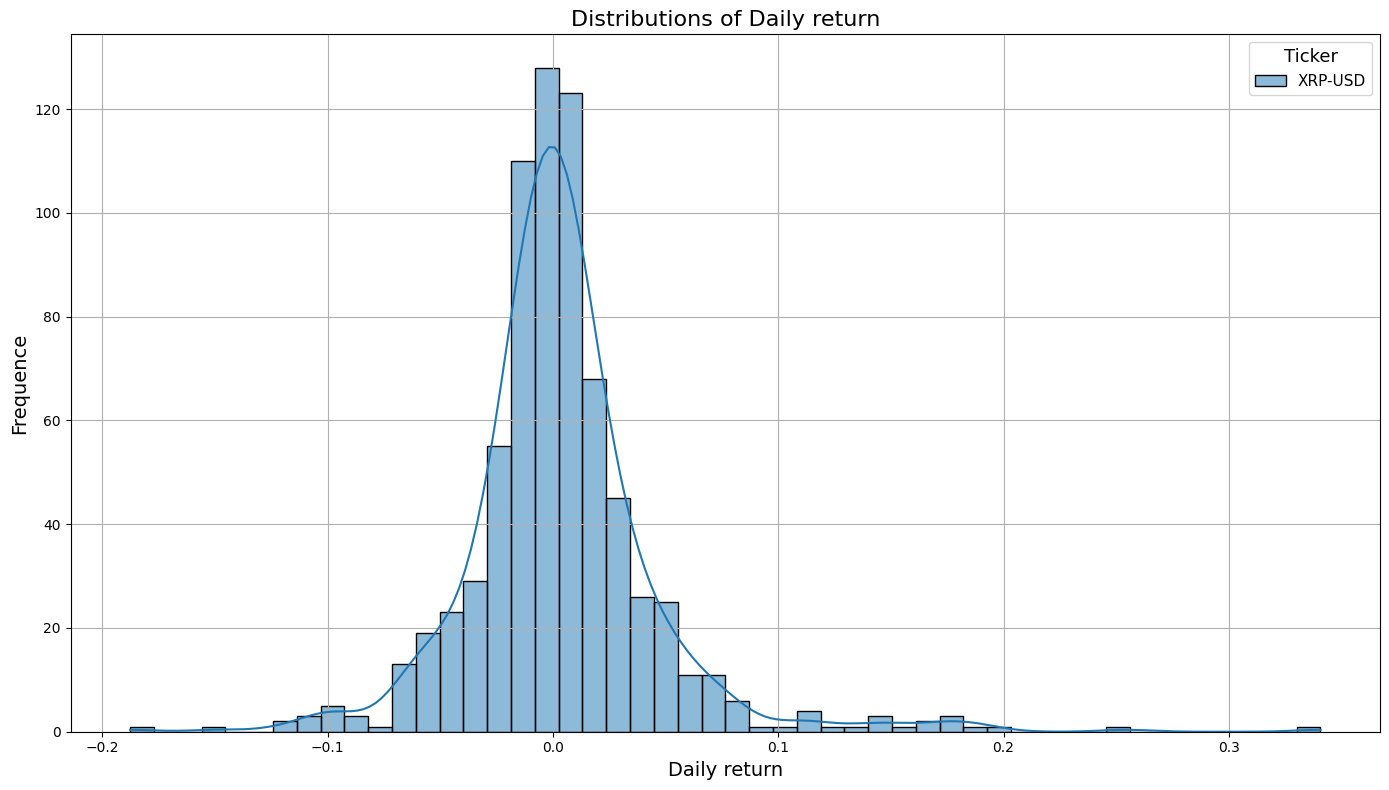

In [58]:


for ticker in unique_ticker:
    tickers_data=crypto_data[crypto_data['Ticker']==ticker]
    plt.figure(figsize=(14,8))
    sb.histplot(tickers_data['Daily return'], bins=50, kde=True, label=ticker, alpha=0.5)

    plt.title('Distributions of Daily return', fontsize =16)
    plt.xlabel('Daily return', fontsize=14)
    plt.ylabel('Frequence', fontsize=14)
    plt.legend(title='Ticker',title_fontsize='13', fontsize='11')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

 Let's have a look on correlation matrix

In [69]:
daily_returns=crypto_data.pivot_table(index='Date', columns='Ticker', values='Daily return')
correlation_matrix=daily_returns.corr()

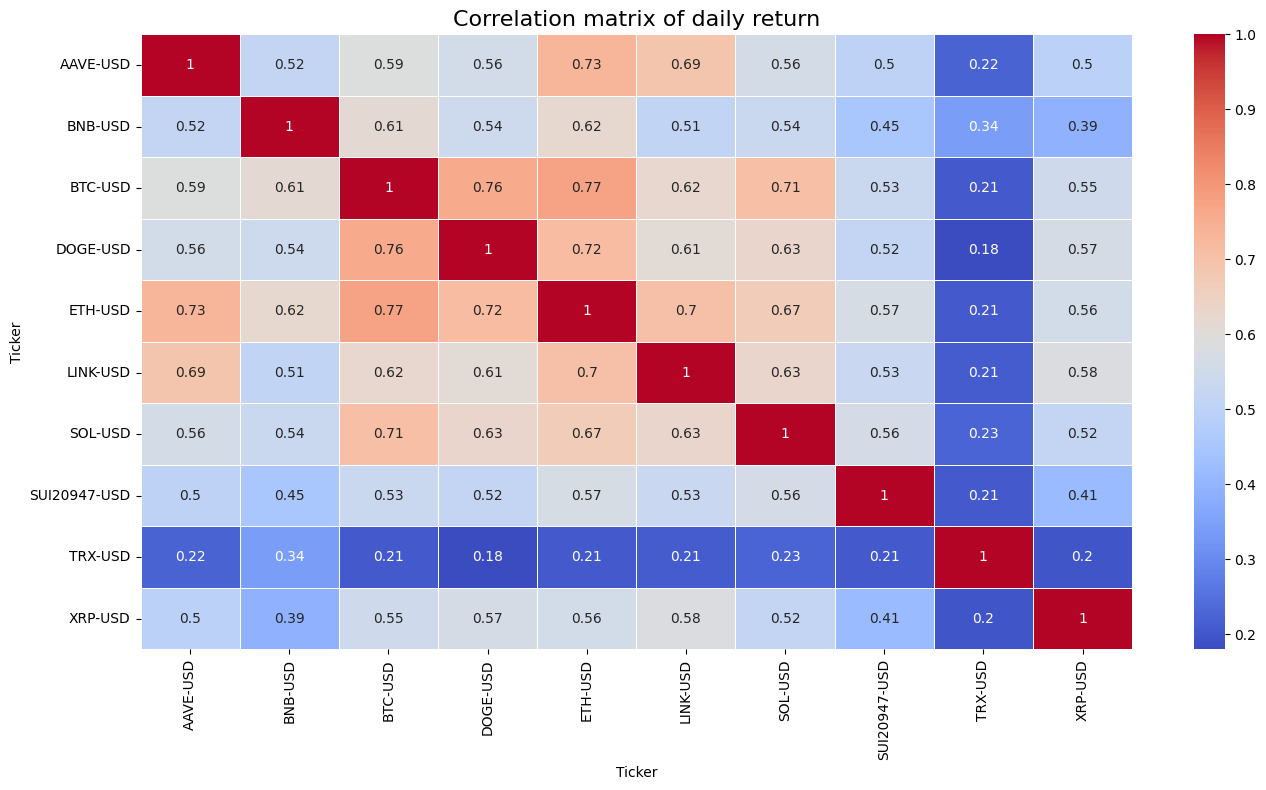

In [73]:
plt.figure(figsize=(14,8))
sb.heatmap(correlation_matrix,cmap='coolwarm',annot=True,linewidths=0.5,fmt='.2g',annot_kws={"size":10})
plt.title('Correlation matrix of daily return',fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 All these cryptocurrencies show a high positive correlation with each other, except TRX, which has a low positive correlation with the other assets. This indicates that they tend to move in the same direction, except possibly TRX.

Let’s calculate the expected returns and volatility for each crypto

In [83]:
expected_return = daily_returns.mean() *365 #annuale returns 
volatility=daily_returns.std()* np.sqrt(365) # annuale volatility 

Crypto_stats=pd.DataFrame({'Expected Return': expected_return,'Volatility':volatility})
Crypto_stats

,Expected Return,Volatility
Ticker,,
AAVE-USD,1.361882,0.959385
BNB-USD,0.835044,0.521348
BTC-USD,0.854934,0.485598
DOGE-USD,1.090253,0.944531
ETH-USD,0.758970,0.676468
LINK-USD,1.135444,0.909062
SOL-USD,1.552826,0.891505
SUI20947-USD,1.516431,1.114200
TRX-USD,1.014585,0.800559


SOL has the highest expected return (155.28%) and SUI20947 has the highest volatility (111,45%). Thus SOL-USD (Return 155.28%, Volatility 89%) → very high return, with less risk than SUI20947(Return 152%, Volatility 111,45%)

BTC-USD (Return 85%, Volatility 48%) → relatively low risk, decent return, more stable compared to altcoins.

ETH-USD (Return 76%, Volatility 67%) → lower return but moderate risk.

BNB-USD (Return 83%, Volatility 52%) → good balance, similar to BTC but slightly more volatile.

Next, we will:

- Generate a large number of random portfolio weights.
- Calculate the expected return and volatility for each portfolio.
- Plot these portfolios to visualize the efficient frontier.


In [109]:
# funtion to calculate portfolio performance
def portfolio_performance(weights,returns,cov_matrix):
    portfolio_return=np.dot(weights,returns)
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
    return portfolio_return, portfolio_volatility


In [101]:
#number of portfolio 
num_portfolios=10000

In [103]:
# arrays to store the results
results=np.zeros((3,num_portfolios))

In [105]:
# annualized covariance matrix
cov_matrix=daily_returns.cov() *365

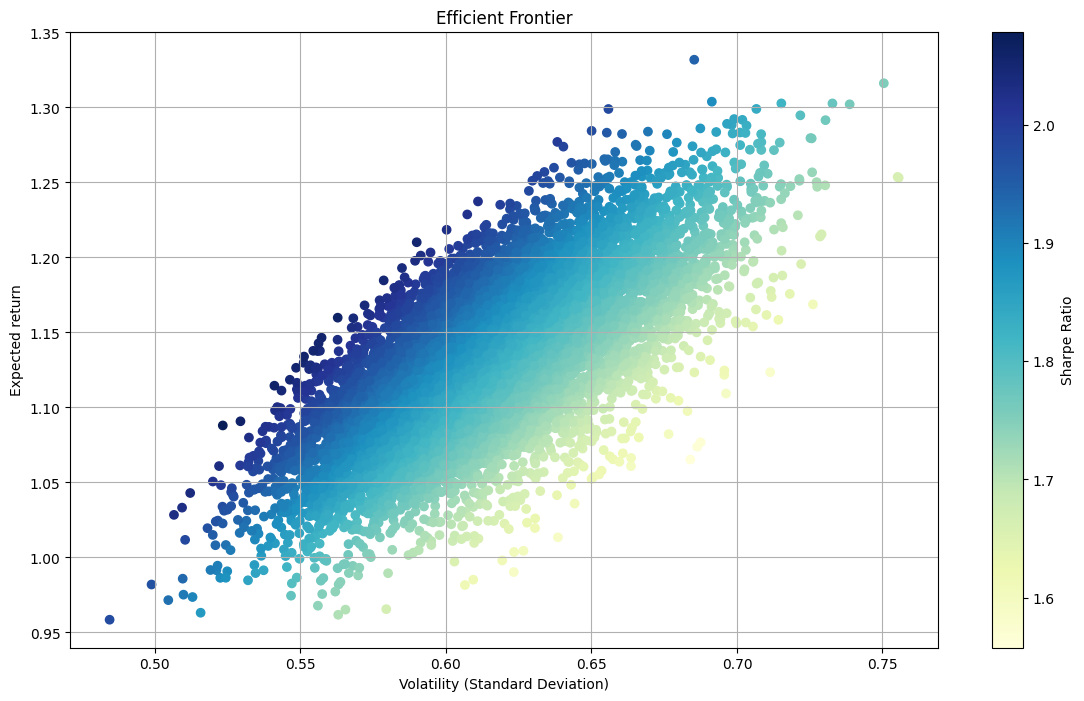

In [117]:
np.random.seed(42)

for i in range(num_portfolios):
    weights=np.random.random(len(unique_ticker))
    weights/=np.sum(weights)

    portfolio_return, portfolio_volatility=portfolio_performance(weights,expected_return,cov_matrix)

    results[0,i]=portfolio_return
    results[1,i]=portfolio_volatility
    results[2,i]=portfolio_return/portfolio_volatility #Sharpe Ratio

plt.figure(figsize=(14,8))
plt.scatter(results[1,:],results[0,:],c=results[2,:],cmap='YlGnBu', marker='o')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show() 

Each dot represents a portfolio, with color indicating its Sharpe ratio—a measure of risk-adjusted return. Portfolios along the left edge of the frontier (closer to the y-axis) deliver the best expected returns for a given level of volatility, making them optimal. Darker blue portfolios have higher Sharpe ratios, reflecting stronger risk-adjusted performance.

Here’s how to identify the portfolio with the maximum Sharpe ratio:

In [126]:
max_shape=np.argmax(results[2,:])
max_return=results[0,max_shape]
max_volatility=results[1,max_shape]
max_sharpe_ratio=results[2,max_shape]

max_return,max_volatility,max_sharpe_ratio

(1.087988331449109, 0.5233356392326203, 2.0789494349065403)

The portfolio with the maximum Sharpe ratio has the following characteristics:

- __Expected Return__: ~108.8%
- __Volatility__: ~52.33%
- __Sharpe Ratio__: ~2.08

In [128]:
for i in range(num_portfolios):
    weights=np.random.random(len(unique_ticker))
    weights/=np.sum(weights)

    portfolio_return, portfolio_volatility=portfolio_performance(weights,expected_return,cov_matrix)

    if results[2,i]==max_sharpe_ratio:
        weights_max=weights
        break



portfolio_weights_df=pd.DataFrame({'Ticker':unique_ticker, 'Weight': weights_max})
portfolio_weights_df

,Ticker,Weight
0,AAVE-USD,0.074598
1,BNB-USD,0.082719
2,BTC-USD,0.125023
3,DOGE-USD,0.110785
4,ETH-USD,0.050139
5,LINK-USD,0.042322
6,SOL-USD,0.149739
7,SUI20947-USD,0.146337
8,TRX-USD,0.069259
9,XRP-USD,0.149079


The output shows a diversified portfolio with the following allocations:

- SOL (15%)
- SUI (14,6%)
- AAVE (7,45%)
- BNB (8,27%)
- BTC (12,5%)
- DOGE (11,07%)
- ETH (5%)
- LINK (4,2%)
- TRX (6,92%)
- XRP (14,91%)
